In [91]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [133]:
df = pd.read_excel("C:/Users/이민정/Desktop/데이터톤/지명타자_2013~2025.xlsx",sheet_name='비율스탯_타포지션추가')
df

,Rank,Name,Team,Position,G,oWAR,dWAR,PA,ePA,AB,...,CS/PA,BB/PA,HP/PA,IB/PA,SO/PA,GDP/PA,SH/PA,SF/PA,WAR/PA,WAR/G
0,1,페르난데스,두산,DH,568,14.18,-0.35,2480,2474,2206,...,0.002016,0.088306,0.010887,0.003226,0.070968,0.040726,0.000000,0.011290,0.005577,0.024349
1,2,이대호,롯데,DH,679,10.85,-0.07,2820,2800,2530,...,0.000355,0.078014,0.012766,0.010638,0.111348,0.034043,0.000000,0.012057,0.003819,0.015862
2,3,김태균,한화,DH,506,10.42,-0.16,2084,2066,1791,...,0.000480,0.119002,0.011516,0.012476,0.165547,0.025912,0.000480,0.009597,0.004923,0.020277
3,4,이승엽,삼성,DH,526,9.23,0.22,2226,2217,1990,...,0.002246,0.086253,0.008985,0.005391,0.144654,0.015274,0.000000,0.010782,0.004245,0.017966
4,5,박용택,LG,DH,572,8.57,0.68,2208,2203,1954,...,0.005435,0.095109,0.006793,0.005888,0.149457,0.025815,0.000000,0.013134,0.004189,0.016171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,96,이재현,삼,SS,419,7.54,1.25,1597,1571,1370,...,0.003131,0.103319,0.014402,0.001252,0.183469,0.018159,0.015028,0.009393,0.005504,0.020979
131,97,박정권,S,1B,629,7.28,1.49,2308,2296,2041,...,0.007366,0.096620,0.007366,0.003466,0.217071,0.013432,0.002600,0.009099,0.003795,0.013927
132,98,하주석,한,SS,861,9.65,-0.99,3190,3152,2919,...,0.013166,0.057680,0.012853,0.000940,0.235423,0.012539,0.011285,0.003135,0.002715,0.010058
133,99,김태군,N,C,1219,3.74,4.69,3401,3284,2972,...,0.002058,0.054102,0.028521,0.000588,0.123199,0.033520,0.034108,0.009409,0.002479,0.006916


In [135]:
df.columns

Index(['Rank', 'Name', 'Team', 'Position', 'G', 'oWAR', 'dWAR', 'PA', 'ePA',
       'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HP',
       'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'R/ePA',
       'wRC+', 'WAR', 'oWAR/PA', 'dWAR/G', 'R/PA', 'H/PA', '2B/PA', '3B/PA',
       'HR/PA', 'RBI/PA', 'SB/PA', 'CS/PA', 'BB/PA', 'HP/PA', 'IB/PA', 'SO/PA',
       'GDP/PA', 'SH/PA', 'SF/PA', 'WAR/PA', 'WAR/G'],
      dtype='object')

In [137]:
df1 = df.iloc[:36]

In [139]:
dh_group = df[df['Position'] == 'DH']
non_dh_group = df[df['Position'] != 'DH']


metrics = ['AVG', 'OBP', 'SLG', 'OPS', 'R/ePA', 'wRC+',
       'oWAR/PA', 'dWAR/G', 'R/PA', 'H/PA', '2B/PA', '3B/PA', 'HR/PA',
       'RBI/PA', 'SB/PA', 'CS/PA', 'BB/PA', 'HP/PA', 'IB/PA', 'SO/PA',
       'GDP/PA', 'SH/PA', 'SF/PA', 'WAR/PA', 'WAR/G']

results = []

for metric in metrics:
    
    dh_values = dh_group[metric].dropna()
    non_dh_values = non_dh_group[metric].dropna()
    
    t_stat, p_value = ttest_ind(dh_values, non_dh_values, equal_var=False)  # Welch's t-test
    
    results.append({
        '지표': metric,
        'DH 평균': dh_values.mean(),
        'Non-DH 평균': non_dh_values.mean(),
        't-stat': t_stat,
        'p-value': p_value
    })

result_df = pd.DataFrame(results)
result_df.sort_values('p-value')

,지표,DH 평균,Non-DH 평균,t-stat,p-value
14,SB/PA,0.005573,0.018524,-7.246847,3.217471e-11
15,CS/PA,0.002808,0.007280,-6.645400,1.986820e-09
21,SH/PA,0.002190,0.007800,-5.760805,6.170073e-08
24,WAR/G,0.006117,0.022041,-5.469971,1.936540e-06
7,dWAR/G,-0.001658,0.000772,-4.842219,1.187327e-05
11,3B/PA,0.001659,0.003928,-4.543413,1.985880e-05
23,WAR/PA,0.000988,0.005635,-4.608807,4.367874e-05
6,oWAR/PA,0.001612,0.005424,-4.319566,1.022119e-04
4,R/ePA,0.108028,0.135848,-4.105038,1.749962e-04
8,R/PA,0.107436,0.134461,-4.003934,2.391328e-04


### 머신러닝

In [149]:
df['DH'] = df['Position'].apply(lambda x: 1 if x == 'DH' else 0)

X = df.drop(columns=['DH', 'Position','Rank', 'Name', 'Team'])
y = df['DH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [163]:
# 로지스틱 회귀
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# 피처중요도
coef = lr.coef_[0]
features = X.columns
importance_lr = pd.Series(coef, index=features).sort_values(key=abs, ascending=False)
print("Logistic Regression feature importance:\n", importance_lr.head(10))

Logistic Regression Accuracy: 0.9259259259259259
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.86      0.86      0.86         7

    accuracy                           0.93        27
   macro avg       0.90      0.90      0.90        27
weighted avg       0.93      0.93      0.93        27

Logistic Regression feature importance:
 CS/PA     -0.790562
3B/PA     -0.541635
SB/PA     -0.538068
WAR/G     -0.502359
WAR/PA    -0.477714
BB/PA     -0.475224
BB        -0.464429
WAR       -0.461759
oWAR/PA   -0.449828
SH/PA     -0.440821
dtype: float64


In [161]:
# 랜덤포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 피처중요도
importance_rf = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("Random Forest feature importance:\n", importance_rf.head(10))

Random Forest Accuracy: 0.9259259259259259
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.86      0.86      0.86         7

    accuracy                           0.93        27
   macro avg       0.90      0.90      0.90        27
weighted avg       0.93      0.93      0.93        27

Random Forest feature importance:
 WAR     0.115043
CS      0.077620
R       0.058563
RBI     0.052825
SO      0.052779
oWAR    0.051175
AB      0.050892
PA      0.045737
BB      0.044577
H       0.041227
dtype: float64


In [159]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# 피처중요도
importance_xgb = pd.Series(xgb_model.feature_importances_, index=features).sort_values(ascending=False)
print("XGBoost feature importance:\n", importance_xgb.head(10))

XGBoost Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.86      0.92         7

    accuracy                           0.96        27
   macro avg       0.98      0.93      0.95        27
weighted avg       0.96      0.96      0.96        27

XGBoost feature importance:
 WAR       0.437711
SB        0.131227
CS        0.126638
SO        0.105766
PA        0.050612
dWAR      0.033360
SH        0.032831
WAR/PA    0.030600
H/PA      0.015669
oWAR      0.012558
dtype: float32


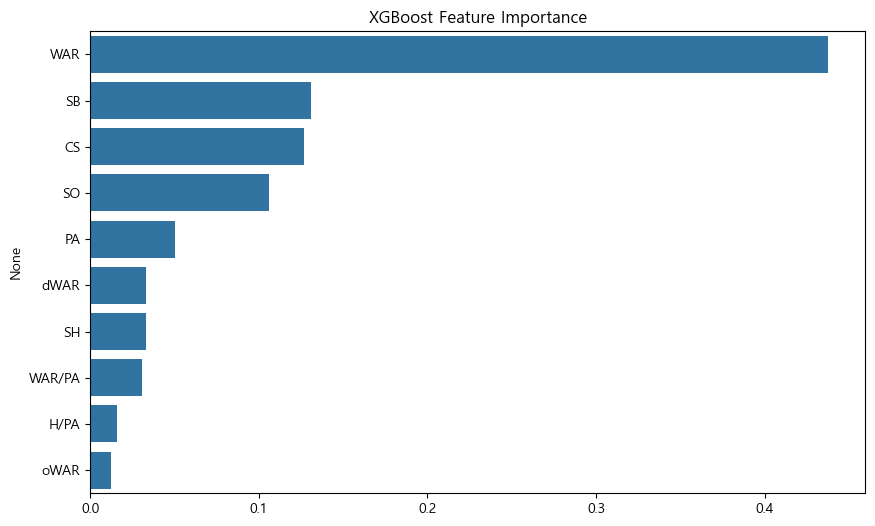

In [169]:
plt.figure(figsize=(10,6))
sns.barplot(x=importance_xgb.head(10).values, y=importance_xgb.head(10).index)
plt.title('XGBoost Feature Importance')
plt.show()

### DH 선수들끼리의 군집분석

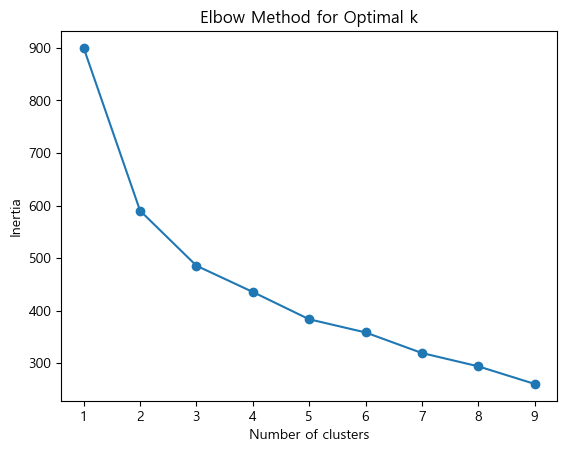

In [74]:
features = ['AVG', 'OBP', 'SLG', 'OPS', 'R/ePA', 'wRC+',
       'oWAR/PA', 'dWAR/G', 'R/PA', 'H/PA', '2B/PA', '3B/PA', 'HR/PA',
       'RBI/PA', 'SB/PA', 'CS/PA', 'BB/PA', 'HP/PA', 'IB/PA', 'SO/PA',
       'GDP/PA', 'SH/PA', 'SF/PA', 'WAR/PA', 'WAR/G']

# 결측치가 있는 행 제거
X = df1[features].dropna()

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 엘보우 메서드로 최적 k 찾기
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [76]:
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_scaled)

df1.loc[X.index, 'Cluster'] = labels

X_scaled_df = pd.DataFrame(X_scaled, columns=features, index=X.index)

In [78]:
print(df1['Cluster'].value_counts())

Cluster
4.0    14
1.0    11
0.0     8
2.0     2
3.0     1
Name: count, dtype: int64


In [80]:
cluster_summary = df1.groupby('Cluster')[features].mean()
print(cluster_summary)

              AVG       OBP       SLG       OPS     R/ePA        wRC+  \
Cluster                                                                 
0.0      0.233625  0.310000  0.345250  0.655250  0.084250   64.862500   
1.0      0.292818  0.379364  0.491000  0.870364  0.129909  125.627273   
2.0      0.155500  0.155500  0.155500  0.311000  0.000000  -47.400000   
3.0      0.158000  0.304000  0.211000  0.515000  0.044000   35.800000   
4.0      0.291643  0.369571  0.437786  0.807357  0.124429  114.600000   

          oWAR/PA    dWAR/G      R/PA      H/PA  ...     CS/PA     BB/PA  \
Cluster                                          ...                       
0.0     -0.002116 -0.002717  0.083732  0.207097  ...  0.003968  0.085509   
1.0      0.004452 -0.000566  0.129343  0.253031  ...  0.000769  0.110771   
2.0     -0.013778 -0.004000  0.000000  0.155556  ...  0.000000  0.000000   
3.0     -0.003043 -0.008333  0.043478  0.130435  ...  0.000000  0.173913   
4.0      0.004042 -0.001100  0.1

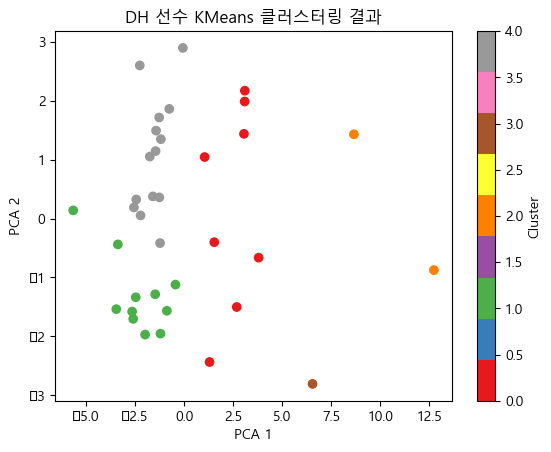

In [82]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df1.loc[X.index, 'Cluster'], cmap='Set1')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DH 선수 KMeans 클러스터링 결과')
plt.colorbar(label='Cluster')
plt.show()

In [84]:
for c in sorted(df1['Cluster'].unique()):
    print(f"\nCluster {c} 선수 수:", len(df1[df1['Cluster'] == c]))
    print(df1[df1['Cluster'] == c]['Name'].values)


Cluster 0.0 선수 수: 8
['김동주' '김동명' '나성용' '김범석' '김상호' '김태완' '팔카' '이병규']

Cluster 1.0 선수 수: 11
['페르난데스' '이대호' '김태균' '이승엽' '최형우' '최준석' '나지완' '나성범' '박석민' '최희섭' '유민상']

Cluster 2.0 선수 수: 2
['이우성' '이명환']

Cluster 3.0 선수 수: 1
['정보명']

Cluster 4.0 선수 수: 14
['박용택' '최진행' '이성열' '전준우' '홍성흔' '손아섭' '김현수' '강백호' '추신수' '서상우' '이진영' '안태영'
 '고종욱' '박한이']


In [86]:
cluster_centers = kmeans.cluster_centers_

representative_players = {}

for i, center in enumerate(cluster_centers):
    # 거리 계산
    distances = np.linalg.norm(X_scaled_df - center, axis=1)
    
    # 인덱스 위치 찾기
    closest_pos = np.argmin(distances)
    
    # 위치 기반 인덱스 찾기
    closest_idx = X_scaled_df.index[closest_pos]
    
    # 대표 선수 이름 저장
    representative_players[i] = df1.loc[closest_idx, 'Name']

print("클러스터별 대표 선수:")
for cluster_num, player in representative_players.items():
    print(f"Cluster {cluster_num}: {player}")

클러스터별 대표 선수:
Cluster 0: 김태완
Cluster 1: 최형우
Cluster 2: 이명환
Cluster 3: 정보명
Cluster 4: 전준우


In [88]:
for metric in features:
    groups = [df1[df1['Cluster'] == c][metric].dropna() for c in df1['Cluster'].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"{metric}: F-stat={f_stat:.3f}, p-value={p_val:.3e}")

AVG: F-stat=21.008, p-value=1.837e-08
OBP: F-stat=40.180, p-value=7.598e-12
SLG: F-stat=56.457, p-value=8.548e-14
OPS: F-stat=81.489, p-value=5.384e-16
R/ePA: F-stat=29.369, p-value=3.785e-10
wRC+: F-stat=64.162, p-value=1.496e-14
oWAR/PA: F-stat=41.558, p-value=4.921e-12
dWAR/G: F-stat=3.618, p-value=1.564e-02
R/PA: F-stat=29.383, p-value=3.763e-10
H/PA: F-stat=12.261, p-value=4.322e-06
2B/PA: F-stat=9.610, p-value=3.568e-05
3B/PA: F-stat=1.425, p-value=2.490e-01
HR/PA: F-stat=10.541, p-value=1.647e-05
RBI/PA: F-stat=52.087, p-value=2.525e-13
SB/PA: F-stat=7.082, p-value=3.589e-04
CS/PA: F-stat=4.396, p-value=6.246e-03
BB/PA: F-stat=10.636, p-value=1.525e-05
HP/PA: F-stat=0.472, p-value=7.557e-01
IB/PA: F-stat=1.852, p-value=1.440e-01
SO/PA: F-stat=2.573, p-value=5.717e-02
GDP/PA: F-stat=12.640, p-value=3.264e-06
SH/PA: F-stat=2.810, p-value=4.237e-02
SF/PA: F-stat=1.569, p-value=2.073e-01
WAR/PA: F-stat=40.962, p-value=5.929e-12
WAR/G: F-stat=24.924, p-value=2.642e-09
